# RFM (Recency Frequency Monetary) Analysis

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

RFM stands for the three dimensions:

1. Recency – How recently did the customer purchase?
2. Frequency – How often do they purchase?
3. Monetary Value – How much do they spend?



Before starting RFM analysis we need to set objective and outcome of analysis, for this example goal is to define class of customer example - Platinum, Gold and Silver.
1. Platinum customer - frequent and more revenue generator.
2. Gold customer - frequent but less revenue generator.
3. silver customer - less frequent and less revenue generator.

In [1]:
#importing all important package..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data into pandas dataframe..
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#information of dataset..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Country with high count must be taken for testing purpose... can we divide based on demographic or similar taste

df.Country.value_counts().head(5)

df = df[df.Country == 'United Kingdom']

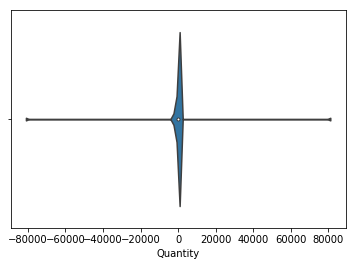

In [6]:
#checking distribution of quantity..

sns.violinplot(df.Quantity)

In [7]:
df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [8]:
#Quantity can not be negative so remove negative values..
df = df[df['Quantity']>0]
df.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

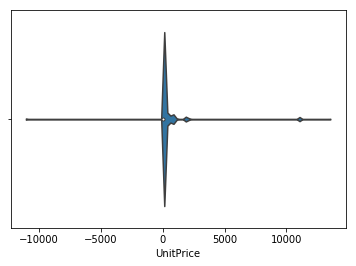

In [9]:
#checking distribution of unit price..
sns.violinplot(df.UnitPrice)

In [10]:
df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

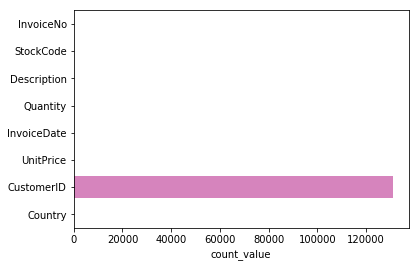

In [11]:
#checking null values in all columns in dataset
null_values = pd.DataFrame(df.isnull().sum(),columns=['count_value'])
ax = sns.barplot(null_values.count_value,null_values.index)

In [12]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
#last date available in our dataset
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [15]:
#use latest date in our data as current date..

import datetime as dt
now = dt.date(2011,12,9)

In [16]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [18]:
#group by customer by last date they purchased...

recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [19]:
#calculate how often he is purchasing with reference to latest date in days..

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [20]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [21]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [22]:
#check frequency of customer means how many transaction has been done..

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


In [23]:
#calculate how much a customer spend in the each transaction...

df['Total_cost'] = df['UnitPrice'] * df['Quantity']

In [24]:
#check summed up spend of a customer with respect to latest date..

monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']

In [25]:
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [26]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together..

#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)

In [27]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,209,33719.73
12749.0,3,5,4090.88
12820.0,3,4,942.34


In [28]:
#checking correctness of output..

df[df.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,77183.6


In [29]:
(now - dt.date(2011,1,18)).days == 325

True

In [31]:
#bring all the quartile value in a single dataframe

rfm_segmentation = rfm.copy()

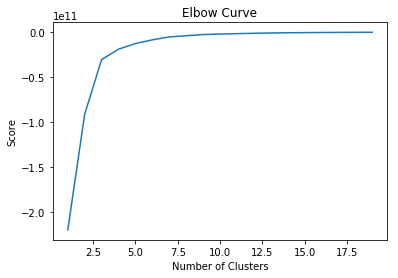

In [32]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [33]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [34]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [35]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747.0,2,11,4196.01,0
12749.0,3,5,4090.88,0
12820.0,3,4,942.34,0
12821.0,214,1,92.72,0
12822.0,70,2,948.88,0
12823.0,74,5,1759.50,0
12824.0,59,1,397.12,0
12826.0,2,7,1474.72,0
12827.0,5,3,430.15,0


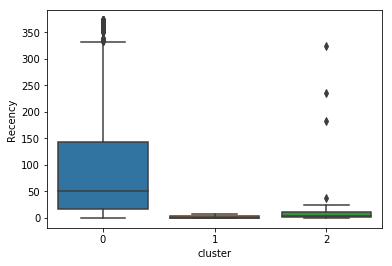

In [36]:
'''
cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

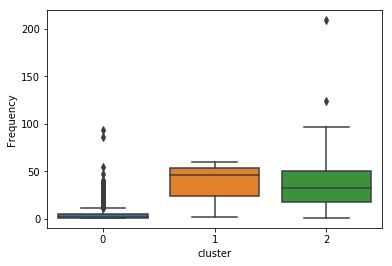

In [37]:
'''
cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in 
race of platinum and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

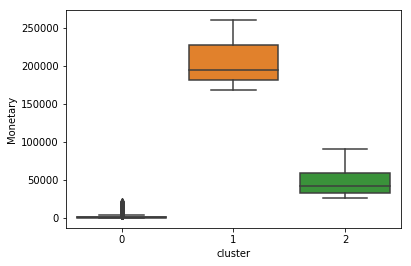

In [38]:
'''
cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as 
cluster 2 have medium level(Gold) and cluster 0 is silver customer.
'''

sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

Based on customer Segmentation we found out
cluster 1 is Platinum customers
Cluster 2 is Gold Customers
Cluster 3 is Silver Customers

# Optional steps if want to perform for more granularity.

In [40]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [42]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25% 
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75% 
values.
'''
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary
0.25,17.0,1.0,300.280
0.50,50.0,2.0,652.280
0.75,142.0,5.0,1576.585


In [43]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [44]:
quantile.to_dict()


{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.28000000000003,
  0.5: 652.2800000000002,
  0.75: 1576.5850000000005}}

In [46]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441
12747.0,2,11,4196.01,0,1,1,1,111
12748.0,0,209,33719.73,2,1,1,1,111
12749.0,3,5,4090.88,0,1,2,1,121
12820.0,3,4,942.34,0,1,2,2,122


In [47]:
'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score 
between 3 and 12. Here the sdvantage is that each of the scores got same importance. However some scores 
will have many sgements as constituents (eg - 413 ad 431)
'''

rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [48]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441,9
12747.0,2,11,4196.01,0,1,1,1,111,3
12748.0,0,209,33719.73,2,1,1,1,111,3
12749.0,3,5,4090.88,0,1,2,1,121,4
12820.0,3,4,942.34,0,1,2,2,122,5


In [49]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  31
Lost Customers:  187
Lost Cheap Customers:  396


In [50]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
18102.0,0,60,259657.30,1,1,1,1,111,3
17450.0,8,46,194550.79,1,1,1,1,111,3
17511.0,2,31,91062.38,2,1,1,1,111,3
16684.0,4,28,66653.56,2,1,1,1,111,3
14096.0,4,17,65164.79,2,1,1,1,111,3
13694.0,3,50,65039.62,2,1,1,1,111,3
15311.0,0,91,60767.90,2,1,1,1,111,3
13089.0,2,97,58825.83,2,1,1,1,111,3
17949.0,1,45,58510.48,2,1,1,1,111,3


In [52]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

RFMScore
111     8443.319409
112     1241.785577
113      443.086667
114      201.120000
121     2482.559268
122     1046.896730
123      508.042326
124      213.450000
131    43967.947500
132      925.355227
133      442.283846
134      209.543871
141     3861.000000
142     1000.233333
143      398.927097
144      165.167547
211     4666.616627
212     1212.085405
221     2513.640375
222     1060.223374
223      522.748525
224      178.407143
231     2381.928889
232      895.916780
233      470.895256
234      216.590000
241     2046.780000
242      806.861053
243      421.580122
244      171.670809
           ...     
312     1061.465652
313      622.430000
321     2413.548276
322     1068.128857
323      495.811921
324      191.892222
331     2604.914444
332      909.421235
333      478.107308
334      219.019714
341     2119.354167
342      909.655366
343      406.943703
344      165.699251
411     3769.904615
412      908.672500
413      475.885000
414       70.020000
421     766

In [53]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

Total_score
3     8443.319409
4     3476.003567
5     2334.664483
6     1396.382037
7     1129.331281
8      695.442278
9      704.139754
10     363.057451
11     280.865560
12     158.611742
Name: Monetary, dtype: float64

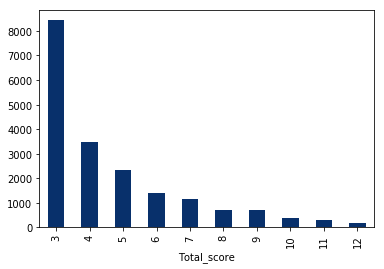

In [54]:
'''
Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

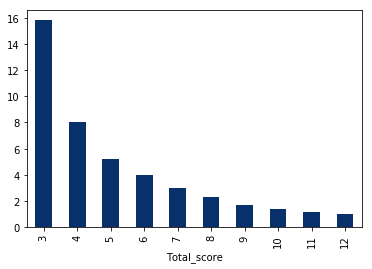

In [55]:
'''
Based on Frequncy we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

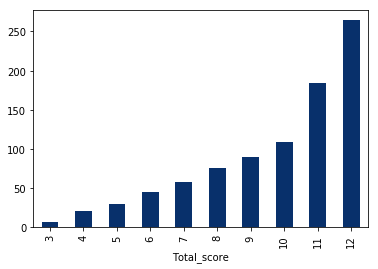

In [56]:
'''
Based on Recency we see Total_score 10,11,12 have highest value which is good for model. because it could have
combination of values such as 444, 434, 334 etc.
'''

rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')

Always open for feedback and suggestions.If it helps Thumbs Up !!!